### Fake News Detection

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Importing the dataset

In [2]:
df = pd.read_csv("FakeNewsNet.csv")

Spliting the dataset for training and testong

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df['title'], df['real'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

visualising the distribution of the dataset

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=100)
word_freq = vectorizer.fit_transform(df['title'])
word_freq = word_freq.sum(axis=0).A1
words = vectorizer.get_feature_names_out()

word_freq_df = pd.DataFrame(zip(words, word_freq), columns=['word', 'frequency'])
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False)

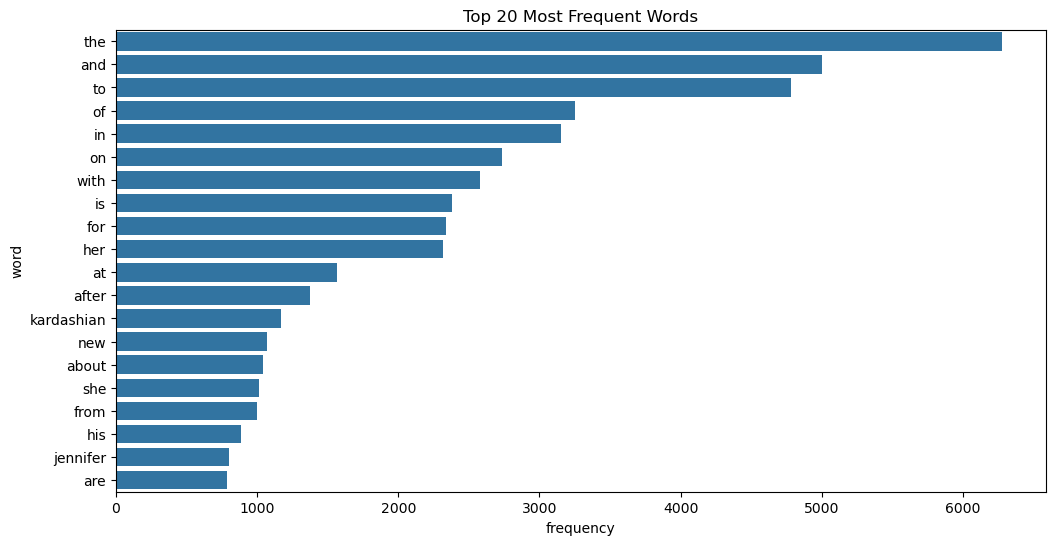

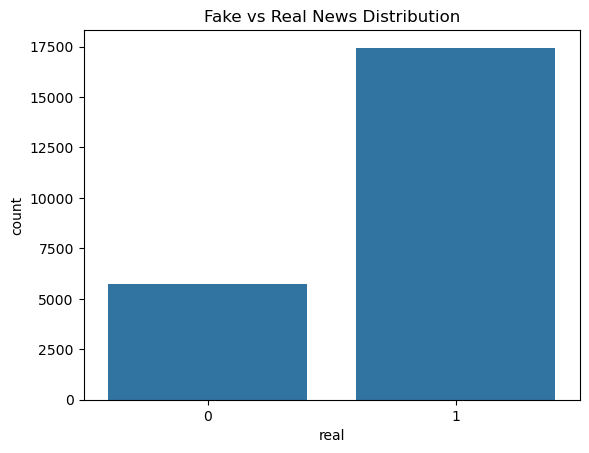

In [5]:
plt.figure(figsize=(12, 6))
sns.barplot(x='frequency', y='word', data=word_freq_df.head(20))
plt.title('Top 20 Most Frequent Words')
plt.show()

# Class Distribution: Fake vs Real News
sns.countplot(x='real', data=df)
plt.title('Fake vs Real News Distribution')
plt.show()

Building the Naive bias model

In [6]:
model_nb= MultinomialNB()
model_nb.fit(X_train_vectorized, y_train)

MultinomialNB()

In [7]:
y_pred = model_nb.predict(X_test_vectorized)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.28      0.43      1131
           1       0.81      0.98      0.89      3509

    accuracy                           0.81      4640
   macro avg       0.83      0.63      0.66      4640
weighted avg       0.82      0.81      0.78      4640

[[ 320  811]
 [  53 3456]]


Linear Regression Model

In [8]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_vectorized, y_train)

y_pred = log_reg.predict(X_test_vectorized)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.44      0.56      1131
           1       0.84      0.96      0.90      3509

    accuracy                           0.83      4640
   macro avg       0.81      0.70      0.73      4640
weighted avg       0.83      0.83      0.82      4640

[[ 500  631]
 [ 145 3364]]


Random Forest Model

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_vectorized, y_train)

y_pred = rf.predict(X_test_vectorized)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.73      0.46      0.57      1131
           1       0.85      0.95      0.89      3509

    accuracy                           0.83      4640
   macro avg       0.79      0.70      0.73      4640
weighted avg       0.82      0.83      0.81      4640

[[ 524  607]
 [ 190 3319]]


Model Evaluation

Accuracy:  0.8282327586206897
Precision:  0.8453897096281202
Recall:  0.9458535195212311
F1-Score:  0.8928043039677203


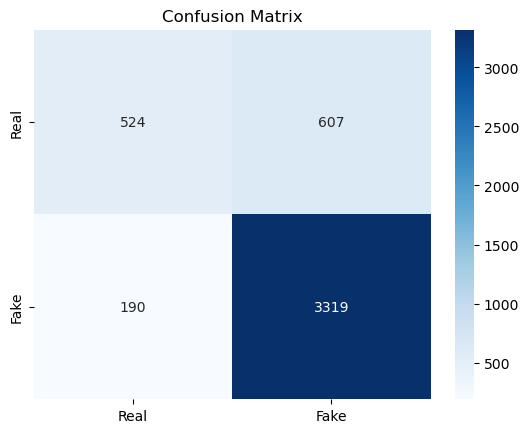

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1-Score: ", f1_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.title("Confusion Matrix")
plt.show()


Model Interpretation

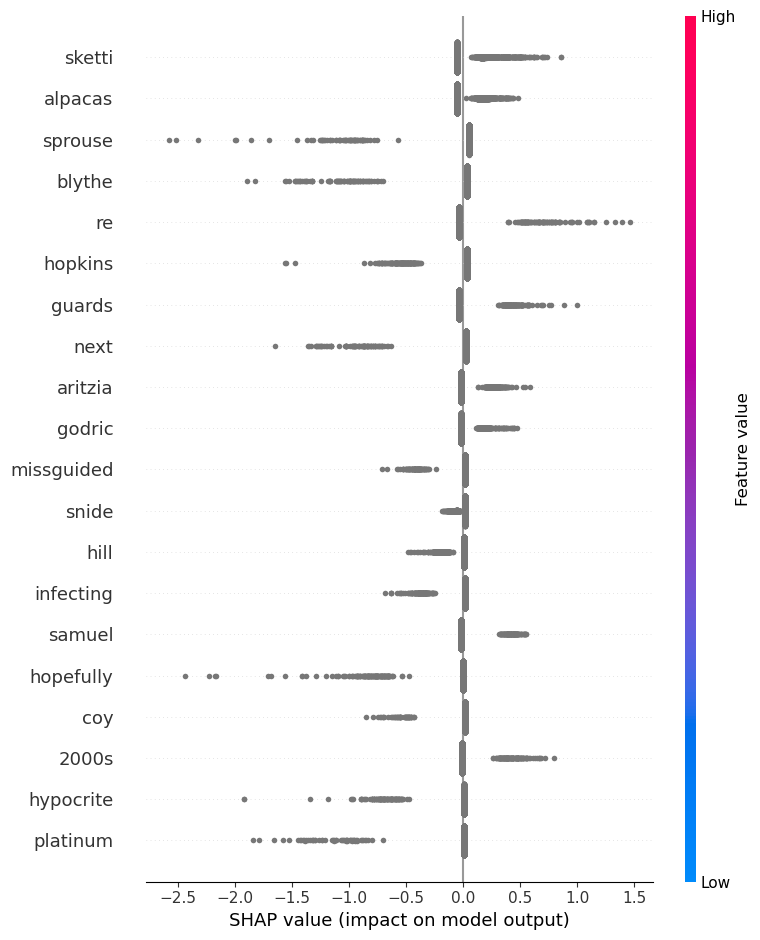

In [11]:
import shap
import numpy

explainer = shap.Explainer(log_reg, X_test_vectorized)
shap_values = explainer.shap_values(X_test_vectorized)

vectorizer = CountVectorizer(max_features=20000)
word_freq = vectorizer.fit_transform(df['title'])
word_freq = word_freq.sum(axis=0).A1
words = vectorizer.get_feature_names_out()

shap.summary_plot(shap_values, X_test_vectorized, feature_names=words)